<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Referral patterns of Indigenous children to ear, nose & throat specialist health services in the Hunter New England health district (2017 - 2021)

### Context

Approximately 30% of urban Aboriginal and Torres Strait Islander children experience persistent middle ear infection or otitis media in early childhood.1-3 Although these ear health problems are often established within the first 2 years of life1,2, many children do not receive effective remediation of hearing impairment until
4–5 years of age.4,5 Because of the role of hearing in early language, cognitive and psychosocial development, timely access to ear health and hearing care is critical
for mitigating developmental delay at school entry.6-8 Although Aboriginal families in urban settings might
be expected to have easy access to ear health and hearing care, difficulties with access to health services are well documented.9-11 

This analysis was conducted to explore current referral patterns of children **under X years** to specialist ear services in the Hunter New England Health District during the years 2017 - 2021. Providing greater visibility of current referral patterns may reveal insights that can be used to improve health outcomes for indigenous children with chronic ear health problems. 


### Data Description

The dataset ENT_referrals_HNE.xlsx was provided by Hunter New England Health and contains five excel spreadsheets which cover different regions within the Hunter New England health district:

 - Greater Newcastle
 - Lower Hunter
 - Upper Hunter
 - Mid Coast
 - New England

In addition, two excel spreadsheets contain the same data separated into public or private sector referral status.

Each spreadsheet contains referrals from that region, with associated information including referring doctor & service, specialist services referred to, whether the referral was processed through the public or private health system, condition urgency and symptomatic description. 

 - **GP/specalist names need to be anonymised or removed for IOD presentation**
 - **What do PMS values stand for?** 
 - **What do status values stand for?**
 - **How was urgency level defined?**

### Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Referral ID              | alphanumeric ID string
| Referral Date            | date of referral
| Status                   | Current state of referral
| Clinical Area            | The type of clinical condition in the referral | ENT = Ear, nose, throat |          
| Service Description      | The specific symptoms observed leading to referral
| Gp Urgency               | The severity of the health condition
| Referral To              | Public or private sector referral
| Refer To Specialist      | Specialist name
| Refer to Service Name    | Specialist service name
| Refer To Address         | Location of specialist service
| Indigenous Status        | Indigenous status of the referred patient
| GP Name                  | Referring doctor
| Practice                 | Referring practice
| **PMS**                      | **unknown** | **Key: BP =, MD =**| 
| Region                   | Region of the Hunter New England health district                                  

### Importing Data

In [201]:
#Load packages

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [202]:
#Load spreadsheets for each region into single dataframe, dropping 'Public' and 'Private' spreadsheets
df = pd.concat(pd.read_excel('/Users/damien/Documents/ENT/data/ENT_referrals_HNE.xlsx', sheet_name=[
    'Greater Newcastle',
    'Lower Hunter',
    'Upper Hunter',
    'Mid Coast',
    'New England']), ignore_index=True)


### Exploring Data Structure

In [203]:
df.head()

,Referral ID,Referral Date,Status,Clinical Area,Service Description,Gp Urgency,Referral To,Refer To Specialist,Refer To Service Name,Refer To Address,Indigenous Status,GP Name,Practice,PMS,Region
0,e5649b608af567cc,2017-09-07,Sent,ENT,Rhinosinusitis,Routine,Public,Dr Nial Jefferson,ENT Department,John Hunter Hospital,NaN,Dr Farzam Tavallaie,Macquarie Family Practice,BP,Greater Newcastle
1,NaN,2017-09-13,Print Only,ENT,Asymmetrical Sensorineural Hearing Loss,Semi Urgent,Private,Dr Peter Barrie,ENT Surgery Services,Dr Peter Barrie Private Rooms,NaN,Dr Bo Wong,Mayfield Medical Connection,BP,Greater Newcastle
2,fdb7009ce730d3d,2017-09-14,Sent,ENT,Otitis Media with Effusion (Glue Ear),Routine,Public,Clinician,Community Speech Therapy Greater Newcastle,Community Health,NaN,Dr Vinay Guddur Karanam,Hello Health Family Practice,BP,Greater Newcastle
3,91a366634b110bcb,2017-09-19,Sent,ENT,Tonsillitis and sore throat,Routine,Public,Dr Nial Jefferson,ENT Department,John Hunter Hospital,NaN,Dr Michael Chapman,Waratah General Practice,BP,Greater Newcastle
4,931c6f99e9196f5f,2017-10-04,Sent,ENT,Tonsillitis and sore throat,Routine,Public,Dr Nial Jefferson,ENT Department,John Hunter Hospital,NaN,Dr Farzam Tavallaie,Macquarie Family Practice,BP,Greater Newcastle


In [204]:
df.tail()

,Referral ID,Referral Date,Status,Clinical Area,Service Description,Gp Urgency,Referral To,Refer To Specialist,Refer To Service Name,Refer To Address,Indigenous Status,GP Name,Practice,PMS,Region
2218,3ea0b2b1254b860a,2021-10-13,Sent,ENT,Tonsillitis and Sore Throat,Non Urgent,Public,Dr Niall Jefferson,ENT Department,John Hunter Hospital,Neither Aboriginal nor Torres Strait Islander,Dr Darla Grace,Barton Lane Practice Tamworth,BP,New England
2219,c251756966f9a47a,2021-10-25,Sent,ENT,Ear Discharge,Non Urgent,Public,Dr Niall Jefferson,ENT Department,John Hunter Hospital,Neither Aboriginal nor Torres Strait Islander,Dr Louisa Badenhorst,Windmill Practice,BP,New England
2220,bf59f49b8dbaaeaf,2021-10-25,Sent,ENT,Nasal Fracture,Urgent,Public,Dr Niall Jefferson,ENT Department,John Hunter Hospital,Other,Dr Malihe Bani Hassan,Inverell Medical Centre,BP,New England
2221,e345ef6442a8f260,2021-10-27,Sent,ENT,Nasal Fracture,Urgent,Public,Dr Niall Jefferson,ENT Department,John Hunter Hospital,Aboriginal but not Torres Strait Islander,Dr Malihe Bani Hassan,Inverell Medical Centre,BP,New England
2222,e4108221884fff4f,2021-11-05,Sent,ENT,Otitis Media with Effusion (Glue Ear),Non Urgent,Public,Dr Niall Jefferson,ENT Department,John Hunter Hospital,Neither Aboriginal nor Torres Strait Islander,Dr Louisa Badenhorst,Windmill Practice,BP,New England


In [205]:
rows, cols = df.shape
print('Number of rows:', rows)
print('Number of columns:', cols)

Number of rows: 2223
Number of columns: 15


In [206]:
print('Number of duplicates:', df.duplicated().sum())

Number of duplicates: 0


In [207]:
# All data are objects (categorical) aside from referral date, which is datetime.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Referral ID            2071 non-null   object        
 1   Referral Date          2223 non-null   datetime64[ns]
 2   Status                 2223 non-null   object        
 3   Clinical Area          2223 non-null   object        
 4   Service Description    2223 non-null   object        
 5   Gp Urgency             2223 non-null   object        
 6   Referral To            2223 non-null   object        
 7   Refer To Specialist    2223 non-null   object        
 8   Refer To Service Name  2223 non-null   object        
 9   Refer To Address       2223 non-null   object        
 10  Indigenous Status      2021 non-null   object        
 11  GP Name                2223 non-null   object        
 12  Practice               2223 non-null   object        
 13  PMS

### Data Cleaning

In [208]:
#Removing Clinical Area column as they are all same value (ENT)

print(df['Clinical Area'].value_counts())

df = df.drop(columns=['Clinical Area'])

ENT    2223
Name: Clinical Area, dtype: int64


In [209]:
#Renaming columns

df.columns = ['referral_id', 
              'referral_date', 
              'status',
              'symptoms',
              'urgency',
              'health_sector',
              'specialist_name',
              'specialist_service_name',
              'specialist_location',
              'indigenous_status',
              'gp_name',
              'gp_practice',
              'pms',
              'region'
             ]

In [210]:
#Setting datetime column as index

df = df.set_index('referral_date')

In [211]:
df.head() 

,referral_id,status,symptoms,urgency,health_sector,specialist_name,specialist_service_name,specialist_location,indigenous_status,gp_name,gp_practice,pms,region
referral_date,,,,,,,,,,,,,
2017-09-07,e5649b608af567cc,Sent,Rhinosinusitis,Routine,Public,Dr Nial Jefferson,ENT Department,John Hunter Hospital,NaN,Dr Farzam Tavallaie,Macquarie Family Practice,BP,Greater Newcastle
2017-09-13,NaN,Print Only,Asymmetrical Sensorineural Hearing Loss,Semi Urgent,Private,Dr Peter Barrie,ENT Surgery Services,Dr Peter Barrie Private Rooms,NaN,Dr Bo Wong,Mayfield Medical Connection,BP,Greater Newcastle
2017-09-14,fdb7009ce730d3d,Sent,Otitis Media with Effusion (Glue Ear),Routine,Public,Clinician,Community Speech Therapy Greater Newcastle,Community Health,NaN,Dr Vinay Guddur Karanam,Hello Health Family Practice,BP,Greater Newcastle
2017-09-19,91a366634b110bcb,Sent,Tonsillitis and sore throat,Routine,Public,Dr Nial Jefferson,ENT Department,John Hunter Hospital,NaN,Dr Michael Chapman,Waratah General Practice,BP,Greater Newcastle
2017-10-04,931c6f99e9196f5f,Sent,Tonsillitis and sore throat,Routine,Public,Dr Nial Jefferson,ENT Department,John Hunter Hospital,NaN,Dr Farzam Tavallaie,Macquarie Family Practice,BP,Greater Newcastle


### Removing Null Values

In [212]:
#There are some missing values in referral ID and indigenous status columns

df.isnull().sum()

referral_id                152
status                       0
symptoms                     0
urgency                      0
health_sector                0
specialist_name              0
specialist_service_name      0
specialist_location          0
indigenous_status          202
gp_name                      0
gp_practice                  0
pms                          2
region                       0
dtype: int64

In [213]:
#Null values are present at a relatively high proportion in one of the columns of most interest to the analysis (indigenous status)

print('Null values of indigenous status percentage of dataset:', np.round((df['indigenous_status'].isnull().sum() / len(df)) * 100), '%')

Null values of indigenous status percentage of dataset: 9.0 %


In [214]:
#There doesn't appear to be any consistent pattern in the null values, meaning they can't be imputed from other datapoints.

df[df.indigenous_status.isnull()]

,referral_id,status,symptoms,urgency,health_sector,specialist_name,specialist_service_name,specialist_location,indigenous_status,gp_name,gp_practice,pms,region
referral_date,,,,,,,,,,,,,
2017-09-07,e5649b608af567cc,Sent,Rhinosinusitis,Routine,Public,Dr Nial Jefferson,ENT Department,John Hunter Hospital,NaN,Dr Farzam Tavallaie,Macquarie Family Practice,BP,Greater Newcastle
2017-09-13,NaN,Print Only,Asymmetrical Sensorineural Hearing Loss,Semi Urgent,Private,Dr Peter Barrie,ENT Surgery Services,Dr Peter Barrie Private Rooms,NaN,Dr Bo Wong,Mayfield Medical Connection,BP,Greater Newcastle
2017-09-14,fdb7009ce730d3d,Sent,Otitis Media with Effusion (Glue Ear),Routine,Public,Clinician,Community Speech Therapy Greater Newcastle,Community Health,NaN,Dr Vinay Guddur Karanam,Hello Health Family Practice,BP,Greater Newcastle
2017-09-19,91a366634b110bcb,Sent,Tonsillitis and sore throat,Routine,Public,Dr Nial Jefferson,ENT Department,John Hunter Hospital,NaN,Dr Michael Chapman,Waratah General Practice,BP,Greater Newcastle
2017-10-04,931c6f99e9196f5f,Sent,Tonsillitis and sore throat,Routine,Public,Dr Nial Jefferson,ENT Department,John Hunter Hospital,NaN,Dr Farzam Tavallaie,Macquarie Family Practice,BP,Greater Newcastle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-22,852f7d1470b1bfd4,Sent,Rhinosinusitis,Routine,Public,Dr Niall Jefferson,ENT Department,John Hunter Hospital,NaN,Dr Hazel Holly,East Maitland Family Medical Centre,BP,Lower Hunter
2019-02-26,b85738b43e355d50,Sent,Acute Otitis Media in Children,Routine,Public,Dr Niall Jefferson,ENT Department,John Hunter Hospital,NaN,Dr Hazel Holly,East Maitland Family Medical Centre,BP,Lower Hunter
2018-10-09,7738900aa6a9fb4a,Sent,Rhinosinusitis,Routine,Public,Dr Niall Jefferson,ENT Department,John Hunter Hospital,NaN,Dr Shuen Yeoh,Ochre Health Bonnells Bay,BP,Mid Coast


In [215]:
#There are also some duplicate categories and some non-relevant information in indigenous_status, these will be consolidated into a smaller set of categories

df.indigenous_status.value_counts()

Neither Aboriginal nor Torres Strait Islander    1154
Other                                             535
Aboriginal but not Torres Strait Islander         212
Not Stated                                         75
Non Aboriginal/Torres Strait Islander              13
Aboriginal                                         11
Both Aboriginal and Torres Strait Islander         10
Torres Strait Islander but not Aboriginal           6
Male                                                3
Female                                              2
Name: indigenous_status, dtype: int64

In [216]:
#Instead of imputation, the null values in indigenous status will be filled with 'Not Stated'

df.indigenous_status.fillna('Not Stated', inplace=True)

In [217]:
#Not stated now contains additional 202 entries that were previously null

df.indigenous_status.value_counts()

Neither Aboriginal nor Torres Strait Islander    1154
Other                                             535
Not Stated                                        277
Aboriginal but not Torres Strait Islander         212
Non Aboriginal/Torres Strait Islander              13
Aboriginal                                         11
Both Aboriginal and Torres Strait Islander         10
Torres Strait Islander but not Aboriginal           6
Male                                                3
Female                                              2
Name: indigenous_status, dtype: int64

In [218]:
#Moving onto null values in referral_id, there appears to be an association with status column, can't see any 'Sent' values as in original dataframe

df[df.referral_id.isnull()]

,referral_id,status,symptoms,urgency,health_sector,specialist_name,specialist_service_name,specialist_location,indigenous_status,gp_name,gp_practice,pms,region
referral_date,,,,,,,,,,,,,
2017-09-13,NaN,Print Only,Asymmetrical Sensorineural Hearing Loss,Semi Urgent,Private,Dr Peter Barrie,ENT Surgery Services,Dr Peter Barrie Private Rooms,Not Stated,Dr Bo Wong,Mayfield Medical Connection,BP,Greater Newcastle
2017-10-31,NaN,Print Only,Recurrent Epistaxis in Children,Semi Urgent,Private,Assoc Prof Paul Walker,ENT Surgery Services,Newcastle Private Hospital,Not Stated,Dr Dobrila Bajic,Main Road Medical Services,MD,Greater Newcastle
2017-11-09,NaN,Print Only,Otitis Media with Effusion (Glue Ear),Semi Urgent,Private,Clinician,Audiology Services,East 'n' Holmes Audiology,Not Stated,Dr Stewart Shields,Fern Bay Medical Centre,BP,Greater Newcastle
2018-09-06,NaN,Print Only,Acute Otitis Media in Children,Urgent,Private,Assoc Prof Paul Walker,ENT Surgery Services,Newcastle Private Hospital,Not Stated,Dr Farzam Tavallaie,Macquarie Family Practice,BP,Greater Newcastle
2018-09-06,NaN,Print Only,Acute Otitis Media in Children,Urgent,Private,Dr Peter Barrie,ENT Surgery Services,Dr Peter Barrie Private Rooms,Not Stated,Dr Farzam Tavallaie,Macquarie Family Practice,BP,Greater Newcastle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-04,NaN,Open,Ear Anomalies,Non Urgent,Private,Dr Allan Forrest,ENT Surgery Services,Dr Allan Forrest - Peel Health Care,Other,Dr Jayantha Weerasekera,MedCIRC Barraba,BP,New England
2021-02-22,NaN,Open,Other ENT Concern,Non Urgent,Private,Dr Allan Forrest,ENT Surgery Services,Dr Allan Forrest - Peel Health Care,Neither Aboriginal nor Torres Strait Islander,Dr Sammu Saman Maheepala,Gwydir Medical,MD,New England
2021-03-12,NaN,Print Only,Rhinosinusitis,Non Urgent,Private,Dr Peter Barrie,ENT Surgery Services,Dr Peter Barrie Private Rooms,Neither Aboriginal nor Torres Strait Islander,Dr Emma Madams,Smith Street Practice,BP,New England


In [219]:
# Apart from 1 value, cells with no referral ID seem to be print only, open or archived

ref_null = df[df.referral_id.isnull()]
ref_null.status.value_counts()

Print Only    122
Open           25
Archived        4
Sent            1
Name: status, dtype: int64

In [220]:
# Keeping referral column as an identifier but dropping status column, as it is not relevant to the analysis.
df = df.drop(columns=['status'])

#This creates 3 apparent duplicates.
df.duplicated().sum()

3

In [221]:
#But they dont seem to actually be duplicate entries.

df.loc[df.duplicated() == True]

,referral_id,symptoms,urgency,health_sector,specialist_name,specialist_service_name,specialist_location,indigenous_status,gp_name,gp_practice,pms,region
referral_date,,,,,,,,,,,,
2020-07-08,NaN,Rhinosinusitis,Non Urgent,Private,Assoc Prof Paul Walker,ENT Surgery Services,Newcastle Private Hospital,Neither Aboriginal nor Torres Strait Islander,Dr Raviraj Stephen,Family Circle Medical Practice,BP,Greater Newcastle
2021-02-22,NaN,Rhinosinusitis,Non Urgent,Private,Assoc Prof Paul Walker,ENT Surgery Services,Newcastle Private Hospital,Neither Aboriginal nor Torres Strait Islander,Dr Raviraj Stephen,Family Circle Medical Practice,BP,Greater Newcastle
2019-05-29,NaN,Rhinosinusitis,Routine,Private,Assoc Prof Paul Walker,ENT Surgery Services,Newcastle Private Hospital,Neither Aboriginal nor Torres Strait Islander,Dr Salina Ahmed,Cessnock Surgery Pty Ltd,MD,Lower Hunter


In [222]:
df.head()

,referral_id,symptoms,urgency,health_sector,specialist_name,specialist_service_name,specialist_location,indigenous_status,gp_name,gp_practice,pms,region
referral_date,,,,,,,,,,,,
2017-09-07,e5649b608af567cc,Rhinosinusitis,Routine,Public,Dr Nial Jefferson,ENT Department,John Hunter Hospital,Not Stated,Dr Farzam Tavallaie,Macquarie Family Practice,BP,Greater Newcastle
2017-09-13,NaN,Asymmetrical Sensorineural Hearing Loss,Semi Urgent,Private,Dr Peter Barrie,ENT Surgery Services,Dr Peter Barrie Private Rooms,Not Stated,Dr Bo Wong,Mayfield Medical Connection,BP,Greater Newcastle
2017-09-14,fdb7009ce730d3d,Otitis Media with Effusion (Glue Ear),Routine,Public,Clinician,Community Speech Therapy Greater Newcastle,Community Health,Not Stated,Dr Vinay Guddur Karanam,Hello Health Family Practice,BP,Greater Newcastle
2017-09-19,91a366634b110bcb,Tonsillitis and sore throat,Routine,Public,Dr Nial Jefferson,ENT Department,John Hunter Hospital,Not Stated,Dr Michael Chapman,Waratah General Practice,BP,Greater Newcastle
2017-10-04,931c6f99e9196f5f,Tonsillitis and sore throat,Routine,Public,Dr Nial Jefferson,ENT Department,John Hunter Hospital,Not Stated,Dr Farzam Tavallaie,Macquarie Family Practice,BP,Greater Newcastle


In [223]:
# Two missing values left in pms, will just drop these

df.isnull().sum()

referral_id                152
symptoms                     0
urgency                      0
health_sector                0
specialist_name              0
specialist_service_name      0
specialist_location          0
indigenous_status            0
gp_name                      0
gp_practice                  0
pms                          2
region                       0
dtype: int64

In [224]:
df = df.dropna(axis=0)

In [225]:
df.isnull().sum()

referral_id                0
symptoms                   0
urgency                    0
health_sector              0
specialist_name            0
specialist_service_name    0
specialist_location        0
indigenous_status          0
gp_name                    0
gp_practice                0
pms                        0
region                     0
dtype: int64

### Rationalising Categories for Each Feature

In [226]:
#There are also some duplicate categories and some non-relevant information in indigenous_status, the most important feature. These will be consolidated into a smaller set of categories

#Question: Could this be done in one line using a dictionary?

df['indigenous_status'] = df.indigenous_status.str.replace('Neither Aboriginal nor Torres Strait Islander','Non-indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Other','Non-indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Aboriginal but not Torres Strait Islander','Indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Non Aboriginal/Torres Strait Islander','Non-indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Aboriginal','Indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Both Aboriginal and Torres Strait Islander','Indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Both Indigenous and Torres Strait Islander','Indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Torres Strait Islander but not Aboriginal','Indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Torres Strait Islander but not Indigenous','Indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Male','Not Stated')
df['indigenous_status'] = df.indigenous_status.str.replace('Female','Not Stated')




In [227]:
# Not Stated values make up slightly more than 10% of the indigenous_status data. Making the decision to drop this data as we can't infer what category they could be assigned to based on other information.

df.indigenous_status.value_counts()

Non-indigenous    1569
Not Stated         267
Indigenous         233
Name: indigenous_status, dtype: int64

In [228]:
df = df[df.indigenous_status.str.contains('Not Stated')==False]

In [229]:
df.indigenous_status.value_counts()

Non-indigenous    1569
Indigenous         233
Name: indigenous_status, dtype: int64

In [237]:
# Creating new column with indigenous status encoded as boolean

df['indigenous_status'] = df['indigenous_status'].astype('category')
codes = df['indigenous_status'].cat.codes
df['status_bool'] = codes.replace({0:1, 1:0})
df.head()

,referral_id,symptoms,urgency,health_sector,specialist_name,specialist_service_name,specialist_location,indigenous_status,gp_name,gp_practice,pms,region,status_bool
referral_date,,,,,,,,,,,,,
2018-11-09,aa38744598a26a98,Neck Lumps in Adults,Very Urgent,Public,Dr Niall Jefferson,ENT Department,John Hunter Hospital,Non-indigenous,Dr Brianna Mary Therese Joseph,Blacksmiths Family Practice,MD,Greater Newcastle,0
2018-11-09,9687c25acc3a7dcf,Hoarse Voice (Dysphonia),Urgent,Public,Dr Niall Jefferson,ENT Department,John Hunter Hospital,Non-indigenous,Dr Guy Streeter-Smith,William Street Family Practice,MD,Greater Newcastle,0
2018-11-13,c8504ad1dfceee7e,Tonsillitis and sore throat,Routine,Public,Dr Niall Jefferson,ENT Department,John Hunter Hospital,Non-indigenous,Dr Linda Liu,William Street Family Practice,MD,Greater Newcastle,0
2018-11-20,35a9826e87a1e0b2,Otitis Media with Effusion (Glue Ear),Semi Urgent,Public,Dr Niall Jefferson,ENT Department,John Hunter Hospital,Indigenous,Dr Lachlan Mead,Raymond Terrace Family Practice,BP,Greater Newcastle,1
2018-11-22,126ecc32d14def00,Recurrent Epistaxis in Children,Routine,Public,Dr Niall Jefferson,ENT Department,John Hunter Hospital,Non-indigenous,Dr George Manoliadis,Nelson Plaza Clinic,BP,Greater Newcastle,0


In [92]:
df[df.specialist_name.str.contains('Barrie') ==True]

,referral_id,symptoms,urgency,health_sector,specialist_name,specialist_service_name,specialist_location,indigenous_status,gp_name,gp_practice,pms,region
referral_date,,,,,,,,,,,,
2021-10-12,,Rhinosinusitis,Non Urgent,Private,Dr Peter Barrie,ENT Surgery Services,Dr Peter Barrie Private Rooms,Non-indigenous,Dr Eric Sticklen,My Medica lServices Port Stephens,BP,Greater Newcastle
2021-10-12,,Other ENT Concern,Non Urgent,Private,Dr Peter Barrie,ENT Surgery Services,Dr Peter Barrie Private Rooms,Non-indigenous,Dr Jason Hart,Charlestown Square Medical Centre,BP,Greater Newcastle
2021-10-01,,Tonsillitis and Sore Throat,Non Urgent,Private,Dr Peter Barrie,ENT Surgery Services,Dr Peter Barrie Private Rooms,Non-indigenous,Dr Vijetha Vellurupalli,Singleton Heights Medical Practice,BP,Upper Hunter


In [93]:
# Moving onto urgency, these categories can be reduced to non-urgent and urgent, given the lack of information about how these different categories were chosen

df.urgency.value_counts()

Urgent         746
Non Urgent     718
Routine        213
Semi Urgent     93
Very Urgent     32
Name: urgency, dtype: int64

In [94]:
df['urgency'] = df.urgency.str.replace('Routine','Non Urgent')
df['urgency'] = df.urgency.str.replace('Semi Urgent','Urgent')
df['urgency'] = df.urgency.str.replace('Very Urgent','Urgent')
df['urgency'] = df.urgency.str.replace('Non Urgent','Non-urgent')

In [95]:
df.urgency.value_counts()

Non-urgent    931
Urgent        871
Name: urgency, dtype: int64

In [96]:
#Now onto health_sector, no issues here

df.health_sector.value_counts()

Public     1798
Private       4
Name: health_sector, dtype: int64

In [97]:
#Looking at specialist services, there could be some overlap and consolidation is possible.

df.specialist_service_name.value_counts()

ENT Department                                1780
Gastroenterology Outpatient Department           6
Community Speech Therapy Greater Newcastle       5
Child and Family Nursing                         4
ENT Surgery Services                             4
Neurology Department                             2
Outpatient Department - Neurology Clinic         1
Name: specialist_service_name, dtype: int64

The original dataframe shows that Peter Barrie and Paul Walker work for ENT surgery services, so these data will be consolidated into ENT surgery.

ENT services will be consolidated into ENT department.

All neurology clinic datapoints will be consolidated into neurology department.


In [98]:
df['specialist_service_name'] = df.specialist_service_name.str.replace('Dr Peter Barrie Private Rooms','ENT Surgery Services')
df['specialist_service_name'] = df.specialist_service_name.str.replace('Prof. Paul Walker Paediatric ENT Surgery Services','ENT Surgery Services')
df['specialist_service_name'] = df.specialist_service_name.str.replace('ENT Services','ENT Department')
df['specialist_service_name'] = df.specialist_service_name.str.replace('Outpatient Department - Neurology Clinic','Neurology Department')



/var/folders/hl/kw0g2fvj6c5cytb4zfp24cl00000gn/T/ipykernel_49409/1498560694.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['specialist_service_name'] = df.specialist_service_name.str.replace('Prof. Paul Walker Paediatric ENT Surgery Services','ENT Surgery Services')


In [99]:
df.specialist_service_name.value_counts()

ENT Department                                1780
Gastroenterology Outpatient Department           6
Community Speech Therapy Greater Newcastle       5
Child and Family Nursing                         4
ENT Surgery Services                             4
Neurology Department                             3
Name: specialist_service_name, dtype: int64

In [100]:
# Moving on to specialist location

df.specialist_location.value_counts()

John Hunter Hospital                            1788
Community Health 621 Hunter Street Newcastle       5
East Maitland Community Health Centre              3
Dr Peter Barrie Private Rooms                      3
Wallsend Community Health Centre                   1
Cessnock Hospital                                  1
Newcastle Private Hospital                         1
Name: specialist_location, dtype: int64

In [101]:
#Remove apostrophe from Hunter Children's ENT
df['specialist_location'] = df.specialist_location.str.replace(r"[\"\',]", '')

/var/folders/hl/kw0g2fvj6c5cytb4zfp24cl00000gn/T/ipykernel_49409/4077535007.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['specialist_location'] = df.specialist_location.str.replace(r"[\"\',]", '')


Again, consolidation and rationalisation is possible. Category names will be shortened and duplicates will be consolidated. Specialist private rooms has no location associated with it, so will be dropped.

In [102]:
df['specialist_location'] = df.specialist_location.str.replace('John Hunter Hospital','John Hunter Hospital, New Lambton Heights')
df['specialist_location'] = df.specialist_location.str.replace('Dr Peter Barrie Private Rooms','Dr Peter Barrie Private Rooms, Broadmeadow')
df['specialist_location'] = df.specialist_location.str.replace('Hunter Childrens ENT  - Newcastle Private Hospital', 'Newcastle Private Hospital')
df['specialist_location'] = df.specialist_location.str.replace('Newcastle Private Hospital','Newcastle Private Hospital, New Lambton Heights')
df['specialist_location'] = df.specialist_location.str.replace('Dr Allan Forrest - Peel Health Care','Peel Health Care, Tamworth')
df['specialist_location'] = df.specialist_location.str.replace('Dr Allan Forrest Private Rooms','Dr Allan Forrest Private Rooms, Dee Why')
df['specialist_location'] = df.specialist_location.str.replace('Community Health 621 Hunter Street Newcastle','Community Health Hunter Street, Newcastle')
df['specialist_location'] = df.specialist_location.str.replace('East Maitland Community Health Centre','Community Health Centre, East Maitland')
df['specialist_location'] = df.specialist_location.str.replace('Wallsend Community Health Centre','Community Health Centre, Wallsend')
df['specialist_location'] = df.specialist_location.str.replace('Cessnock Hospital','Cessnock Hospital, Cessnock')

In [103]:
df = df[df['specialist_location'].str.contains('Specialist Private Rooms')==False]

In [104]:
df.specialist_location.value_counts()

John Hunter Hospital, New Lambton Heights          1788
Community Health Hunter Street, Newcastle             5
Community Health Centre, East Maitland                3
Dr Peter Barrie Private Rooms, Broadmeadow            3
Community Health Centre, Wallsend                     1
Cessnock Hospital, Cessnock                           1
Newcastle Private Hospital, New Lambton Heights       1
Name: specialist_location, dtype: int64

In [105]:
#Now onto referring GP practice, too many to worry about reducing number of categories at this stage.

df.gp_practice.value_counts()

Mount Hutton Medical Practice       58
Mayfield Medical Connection         53
Appletree Family Practice           43
Nelson Plaza Clinic                 42
Wollombi Medical Practice           40
                                    ..
River Street Surgery                 1
Harrington Family Medical Centre     1
Raworth Medical                      1
New Lambton Medical Practice         1
The Lorn Surgery @ 15 Belmore        1
Name: gp_practice, Length: 190, dtype: int64

In [106]:
# And finally, region, all looks fine here.

df.region.value_counts()

Greater Newcastle     1149
Lower Hunter           426
Upper Hunter           102
New England             89
Mid Coast               36
Name: region, dtype: int64

In [107]:
df.head()

,referral_id,symptoms,urgency,health_sector,specialist_name,specialist_service_name,specialist_location,indigenous_status,gp_name,gp_practice,pms,region
referral_date,,,,,,,,,,,,
2018-11-09,aa38744598a26a98,Neck Lumps in Adults,Urgent,Public,Dr Niall Jefferson,ENT Department,"John Hunter Hospital, New Lambton Heights",Non-indigenous,Dr Brianna Mary Therese Joseph,Blacksmiths Family Practice,MD,Greater Newcastle
2018-11-09,9687c25acc3a7dcf,Hoarse Voice (Dysphonia),Urgent,Public,Dr Niall Jefferson,ENT Department,"John Hunter Hospital, New Lambton Heights",Non-indigenous,Dr Guy Streeter-Smith,William Street Family Practice,MD,Greater Newcastle
2018-11-13,c8504ad1dfceee7e,Tonsillitis and sore throat,Non-urgent,Public,Dr Niall Jefferson,ENT Department,"John Hunter Hospital, New Lambton Heights",Non-indigenous,Dr Linda Liu,William Street Family Practice,MD,Greater Newcastle
2018-11-20,35a9826e87a1e0b2,Otitis Media with Effusion (Glue Ear),Urgent,Public,Dr Niall Jefferson,ENT Department,"John Hunter Hospital, New Lambton Heights",Indigenous,Dr Lachlan Mead,Raymond Terrace Family Practice,BP,Greater Newcastle
2018-11-22,126ecc32d14def00,Recurrent Epistaxis in Children,Non-urgent,Public,Dr Niall Jefferson,ENT Department,"John Hunter Hospital, New Lambton Heights",Non-indigenous,Dr George Manoliadis,Nelson Plaza Clinic,BP,Greater Newcastle


### Exploratory Data Analysis

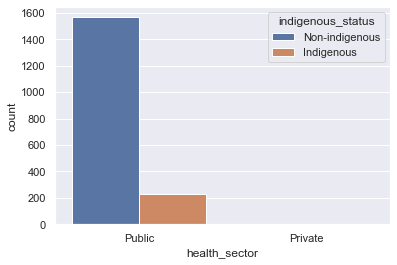

In [108]:
sns.countplot(x='health_sector', data=df, hue='indigenous_status')
plt.show()

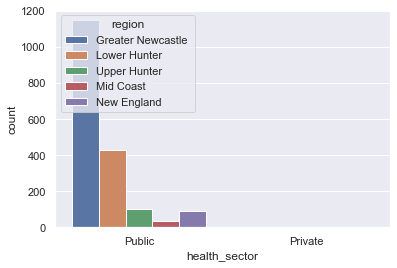

In [109]:
sns.countplot(x='health_sector', data=df, hue='region')
plt.show()

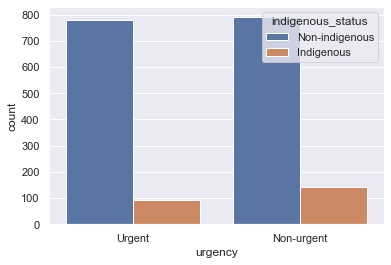

In [110]:
sns.countplot(x='urgency', data=df, hue='indigenous_status')
plt.show()

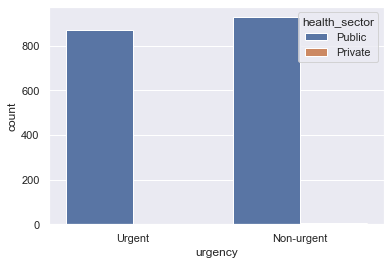

In [111]:
sns.countplot(x='urgency', data=df, hue='health_sector')
plt.show()

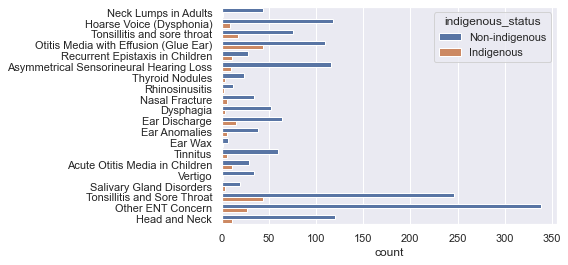

In [112]:
sns.countplot(y='symptoms', data=df, hue='indigenous_status')
#plt.xticks(rotation=90)
plt.ylabel('')
plt.show()

In [141]:
plt.figure(figsize=(10,15))
symptom_df = df.symptoms.value_counts().rename_axis('symptoms').reset_index(name='counts')

symptom_df = df.groupby(['indigenous_status'])['symptoms'].value_counts().unstack().T#.rename_axis('symptoms').reset_index(name='counts')
symptom_df

symptom_df['indig percent total'] = symptom_df.indigenous.apply(lambda x: x)
#ax = sns.barplot(x='counts', y='symptoms', data=symptom_df)
#ax.bar_label(ax.containers[0])
#
#plt.ylabel('')
#plt.show()

indigenous_status,Indigenous,Non-indigenous
symptoms,,
Acute Otitis Media in Children,11,29
Asymmetrical Sensorineural Hearing Loss,10,116
Dysphagia,4,52
Ear Anomalies,6,38
Ear Discharge,15,64
Ear Wax,1,7
Head and Neck,11,120
Hoarse Voice (Dysphonia),9,118
Nasal Fracture,6,34


<Figure size 720x1080 with 0 Axes>

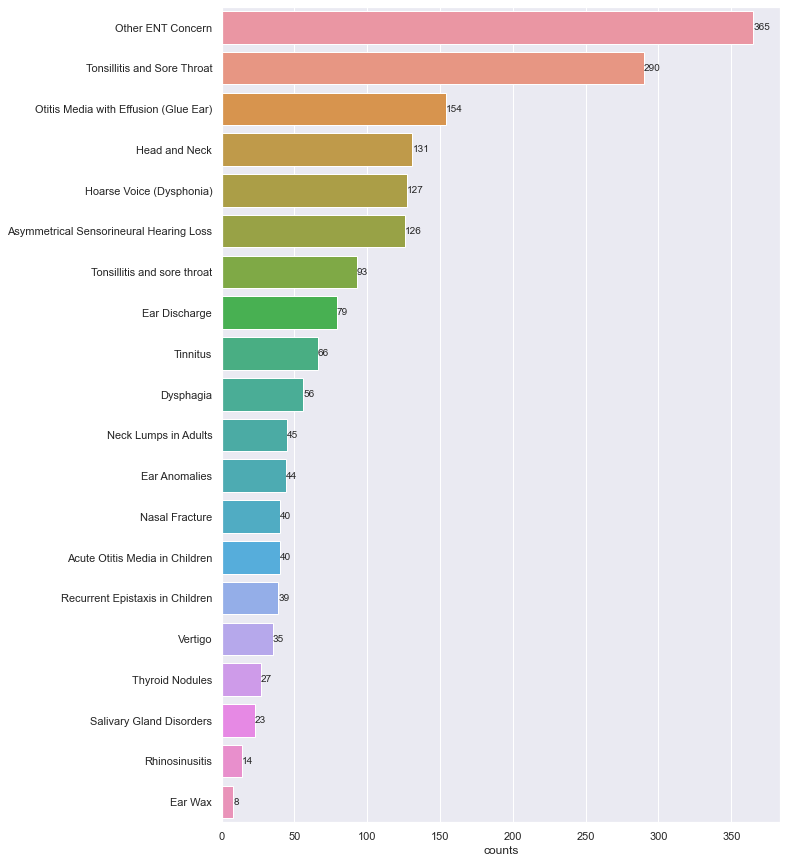

In [142]:
plt.figure(figsize=(10,15))
symptom_df = df.symptoms.value_counts().rename_axis('symptoms').reset_index(name='counts')

ax = sns.barplot(x='counts', y='symptoms', data=symptom_df)
ax.bar_label(ax.containers[0])

plt.ylabel('')
plt.show()

In [125]:
plt.figure(figsize=(10,50))

gp_df = df.gp_practice.value_counts().groupby('indigenous_status').rename_axis('gp_practice').reset_index(name='counts')

ax = sns.barplot(x='counts', y='gp_practice', data=gp_df)
ax.bar_label(ax.containers[0])

plt.ylabel('')
plt.show()


KeyError: 'indigenous_status'

<Figure size 720x3600 with 0 Axes>

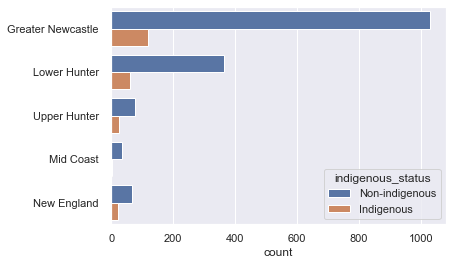

In [115]:
sns.countplot(y='region', data=df, hue='indigenous_status')
#plt.xticks(rotation=90)
plt.ylabel('')
plt.show()

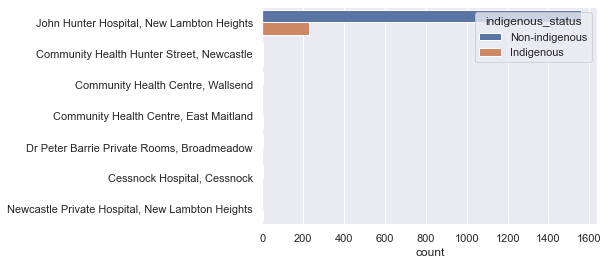

In [116]:
sns.countplot(y='specialist_location', data=df, hue='indigenous_status')
#plt.xticks(rotation=90)
plt.ylabel('')
plt.show()

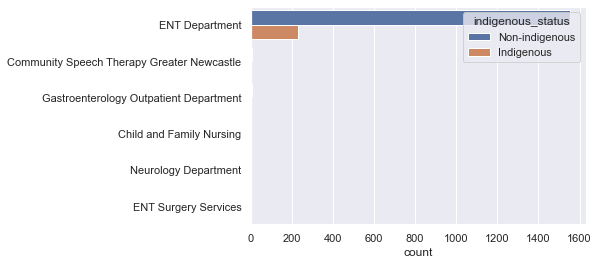

In [117]:
sns.countplot(y='specialist_service_name', data=df, hue='indigenous_status')
#plt.xticks(rotation=90)
plt.ylabel('')
plt.show()

In [118]:
grouped = df.groupby(['region'])['specialist_location'].value_counts(normalize=True)
grouped.head()
#ccupation_counts = (df.groupby(['income'])['occupation']
#                     .value_counts(normalize=True)
#                     .rename('percentage')
#                     .mul(100)
#                     .reset_index()
#                     .sort_values('occupation'))

region              specialist_location                       
Greater Newcastle   John Hunter Hospital, New Lambton Heights     0.992167
                    Community Health Hunter Street, Newcastle     0.004352
                    Dr Peter Barrie Private Rooms, Broadmeadow    0.001741
                    Community Health Centre, East Maitland        0.000870
                    Community Health Centre, Wallsend             0.000870
Name: specialist_location, dtype: float64

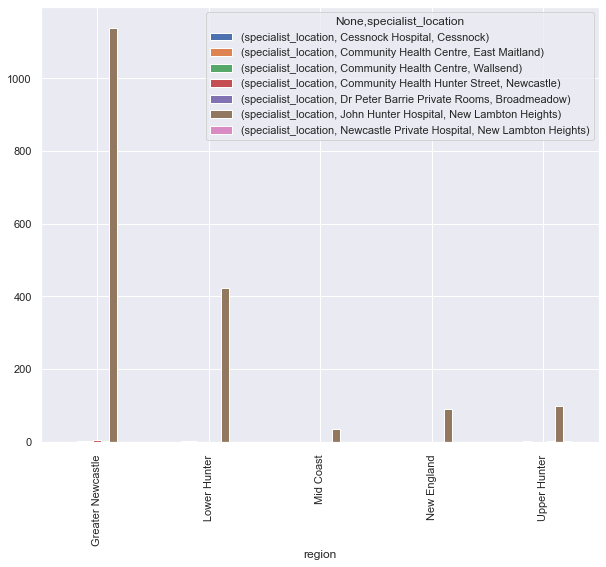

In [119]:
df.groupby(by=['region', 'specialist_location']).agg({'specialist_location': 'count'}).unstack().plot(kind='bar', figsize=(10,8));

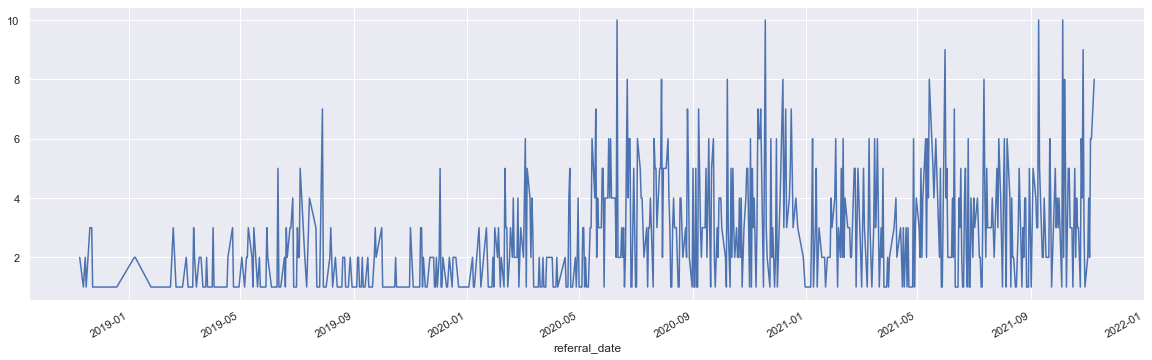

In [120]:
plt.figure(figsize=(20,6))
df.groupby(df.index).size().plot()
plt.show()

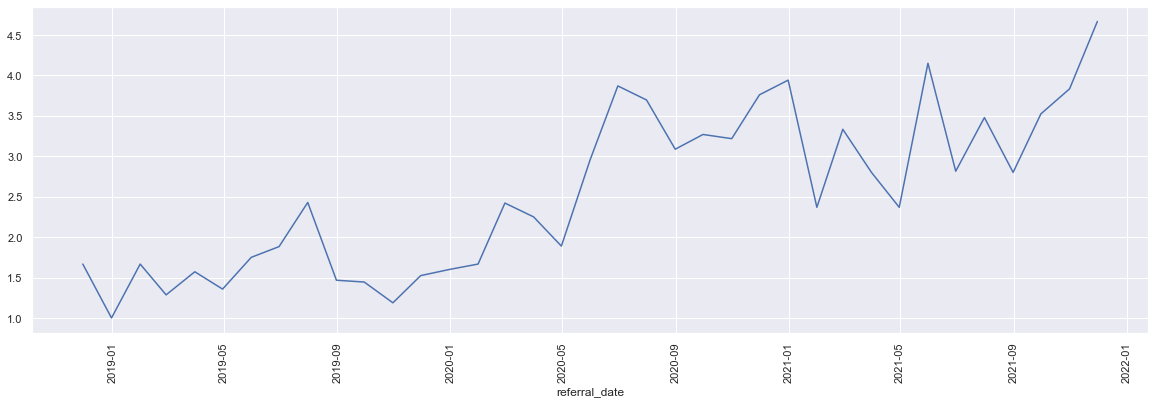

In [121]:
plt.figure(figsize=(20,6))
counts = df.groupby(df.index).size()
resampled = counts.resample("M").mean()
sns.lineplot(data=resampled)
plt.xticks(rotation=90)
plt.show()

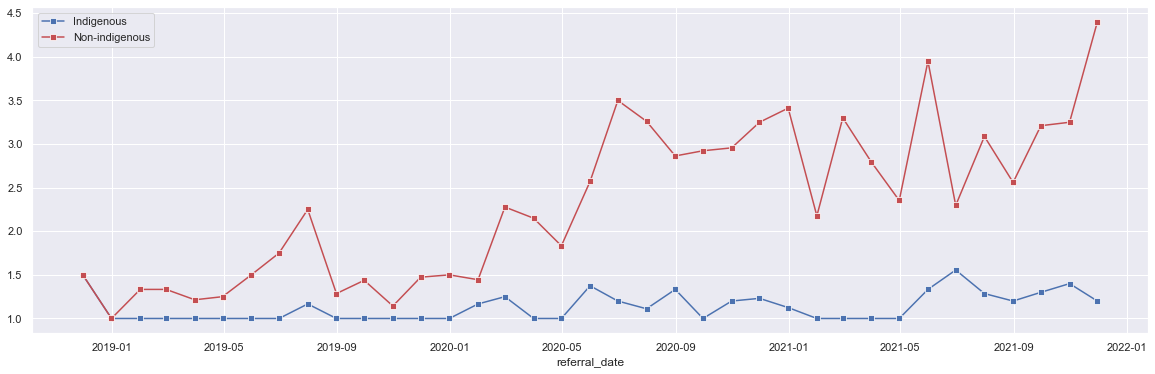

In [122]:
indigenous = df[df.indigenous_status.str.contains('Indigenous')]
non_indigenous = df[df.indigenous_status.str.contains('Non-indigenous')]

plt.figure(figsize=(20,6))

counts_indigenous = indigenous.groupby(indigenous.index).size()
counts_non_indigenous = non_indigenous.groupby(non_indigenous.index).size()

resampled_indigenous = counts_indigenous.resample("M").mean()
resampled_non_indigenous = counts_non_indigenous.resample("M").mean() 

sns.lineplot(data=resampled_indigenous, color='b', marker='s', label='Indigenous')
sns.lineplot(data=resampled_non_indigenous, color='r', marker='s', label='Non-indigenous')

plt.show()

At what average rate are referrals increasing for indigenous vs non-indigenous?

In [123]:
counts_indigenous

referral_date
2018-11-16    1
2018-11-20    3
2018-11-22    1
2018-11-26    1
2018-12-12    1
             ..
2021-11-01    1
2021-11-02    1
2021-11-03    2
2021-11-04    1
2021-11-05    1
Length: 198, dtype: int64

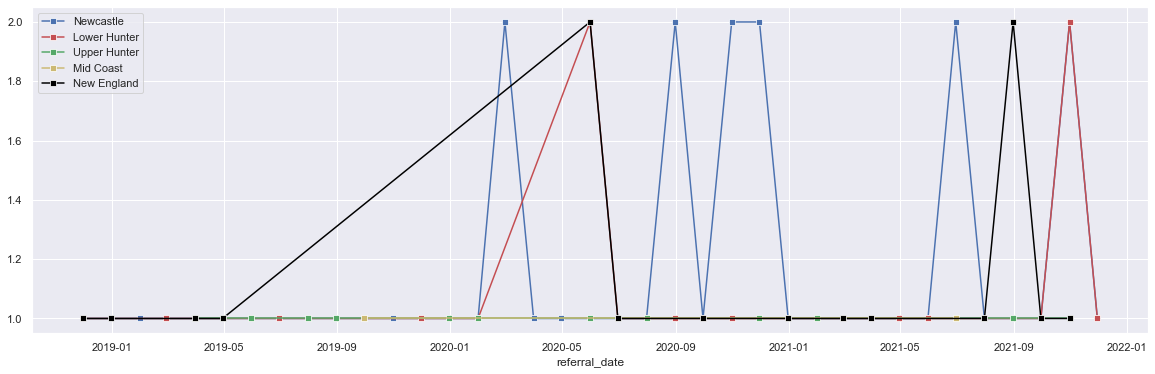

In [252]:
plt.figure(figsize=(20,6))

ind_newcastle = indigenous[indigenous.region.str.contains('Greater Newcastle')]
ind_lower_hunter = indigenous[indigenous.region.str.contains('Lower Hunter')]
ind_upper_hunter = indigenous[indigenous.region.str.contains('Upper Hunter')]
ind_mid_coast = indigenous[indigenous.region.str.contains('Mid Coast')]
ind_new_england = indigenous[indigenous.region.str.contains('New England')]

counts_newcastle = ind_newcastle.groupby(ind_newcastle.index).size()
counts_lower_hunter = ind_lower_hunter.groupby(ind_lower_hunter.index).size()
counts_upper_hunter = ind_upper_hunter.groupby(ind_upper_hunter.index).size()
counts_mid_coast = ind_mid_coast.groupby(ind_mid_coast.index).size()
counts_new_england = ind_new_england.groupby(ind_new_england.index).size()

resampled_newcastle = counts_newcastle.resample("M").max()
resampled_lower_hunter = counts_lower_hunter.resample("M").max() 
resampled_upper_hunter = counts_upper_hunter.resample("M").max() 
resampled_mid_coast = counts_mid_coast.resample("M").max() 
resampled_new_england = counts_new_england.resample("M").max() 

sns.lineplot(data=resampled_newcastle, color='b', marker='s', label='Newcastle')
sns.lineplot(data=resampled_lower_hunter, color='r', marker='s', label='Lower Hunter')
sns.lineplot(data=resampled_upper_hunter, color='g', marker='s', label='Upper Hunter')
sns.lineplot(data=resampled_mid_coast, color='y', marker='s', label='Mid Coast')
sns.lineplot(data=resampled_new_england, color='black', marker='s', label='New England')
plt.show()

In [ ]:
grouped_by_region = df.groupby([df.index.year, 'region'])['indigenous_status'].value_counts().rename_axis(['year', 'region', 'indigenous_status']).reset_index(name='counts')
#grouped_by_region.set_index('year', inplace=True)
grouped_by_region

In [ ]:
plt.figure(figsize=(20,6))

ax = sns.boxplot(x='region', y='counts', hue='year', data=grouped_by_region)
#ax.bar_label(ax.containers[0])
#plt.xticks(rotation=90)

plt.show()

In [ ]:


def trend(s):
    x = np.arange(len(s))
    z = np.polyfit(x, s, 1)
    p = np.poly1d(z)
    t = pd.Series(p(x), index=s.index)
    return t

trend.plot = lambda s: [s.plot(), trend(s).plot()]

trend.plot(df['data'])

trendline = trend(df['data'])



### Feature Engineering

In [ ]:
#Year and month info extrapolated from datetime column
df['year'] = df.index.year
df['month'] = df.index.month